In [9]:
from sklearn.metrics import mean_squared_error
from sklearn.datasets import fetch_lfw_people
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

In [10]:
lfw = fetch_lfw_people(min_faces_per_person=50, resize=0.4)

X = lfw.data
images = lfw.images
h, w = images.shape[1], images.shape[2]

print("Shape of data matrix:", X.shape)

Shape of data matrix: (1560, 1850)


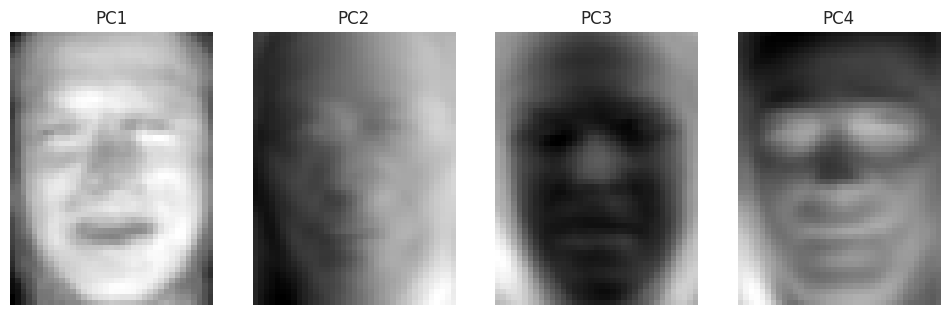

In [11]:
pca = PCA(n_components=150)
pca.fit(X)

eigenfaces = pca.components_.reshape((150, h, w))

fig, axes = plt.subplots(1, 4, figsize=(12, 4))
for i in range(4):
    axes[i].imshow(eigenfaces[i], cmap="gray")
    axes[i].set_title(f"PC{i+1}")
    axes[i].axis("off")
plt.show()

In [12]:
idx = 0
original = X[idx]

ks = [20, 80, 150]
reconstructions = []

for k in ks:
    pca_k = PCA(n_components=k)
    X_pca = pca_k.fit_transform(X)
    X_rec = pca_k.inverse_transform(X_pca)
    reconstructions.append(X_rec[idx])

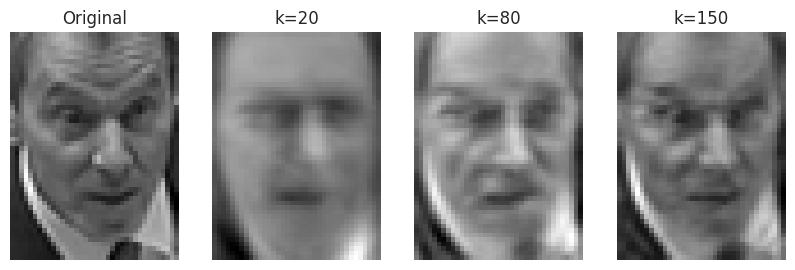

In [13]:
plt.figure(figsize=(10, 6))

plt.subplot(1, 4, 1)
plt.imshow(original.reshape(h, w), cmap="gray")
plt.title("Original")
plt.axis("off")

for i, k in enumerate(ks):
    plt.subplot(1, 4, i+2)
    plt.imshow(reconstructions[i].reshape(h, w), cmap="gray")
    plt.title(f"k={k}")
    plt.axis("off")

plt.show()

In [14]:
for i, k in enumerate(ks):
    mse = mean_squared_error(original, reconstructions[i])
    print(f"MSE for k={k}: {mse:.4f}")

MSE for k=20: 0.0098
MSE for k=80: 0.0038
MSE for k=150: 0.0020


In [15]:
noise = np.random.normal(0, 0.2, size=original.shape)
noisy_img = original + noise

pca_denoise = PCA(n_components=80)
X_pca = pca_denoise.fit_transform(X)
X_rec = pca_denoise.inverse_transform(X_pca)
denoised_img = X_rec[idx]

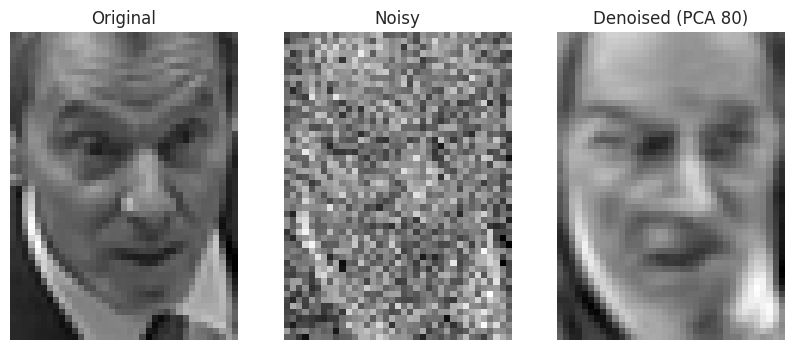

In [16]:
plt.figure(figsize=(10, 4))

images_list = [original, noisy_img, denoised_img]
titles = ["Original", "Noisy", "Denoised (PCA 80)"]

for i in range(3):
    plt.subplot(1, 3, i + 1)
    plt.imshow(images_list[i].reshape(h, w), cmap="gray")
    plt.title(titles[i])
    plt.axis("off")

plt.show()